### Terminologies

* Serialization: The process of encoding JSON. This term refers to the transformation of data into a series of bytes (hence serial) to be stored or transmitted across a network.
* Decoding: The process of decoding JSON. It is the reciprocal process of decoding data that has been stored or delivered in the JSON standard.

In simple terms, encoding is writing to a disk and decoding is reading to the memory

* Simple Python objects are translated to JSON according to a fairly intuitive conversion.
Python 	JSON
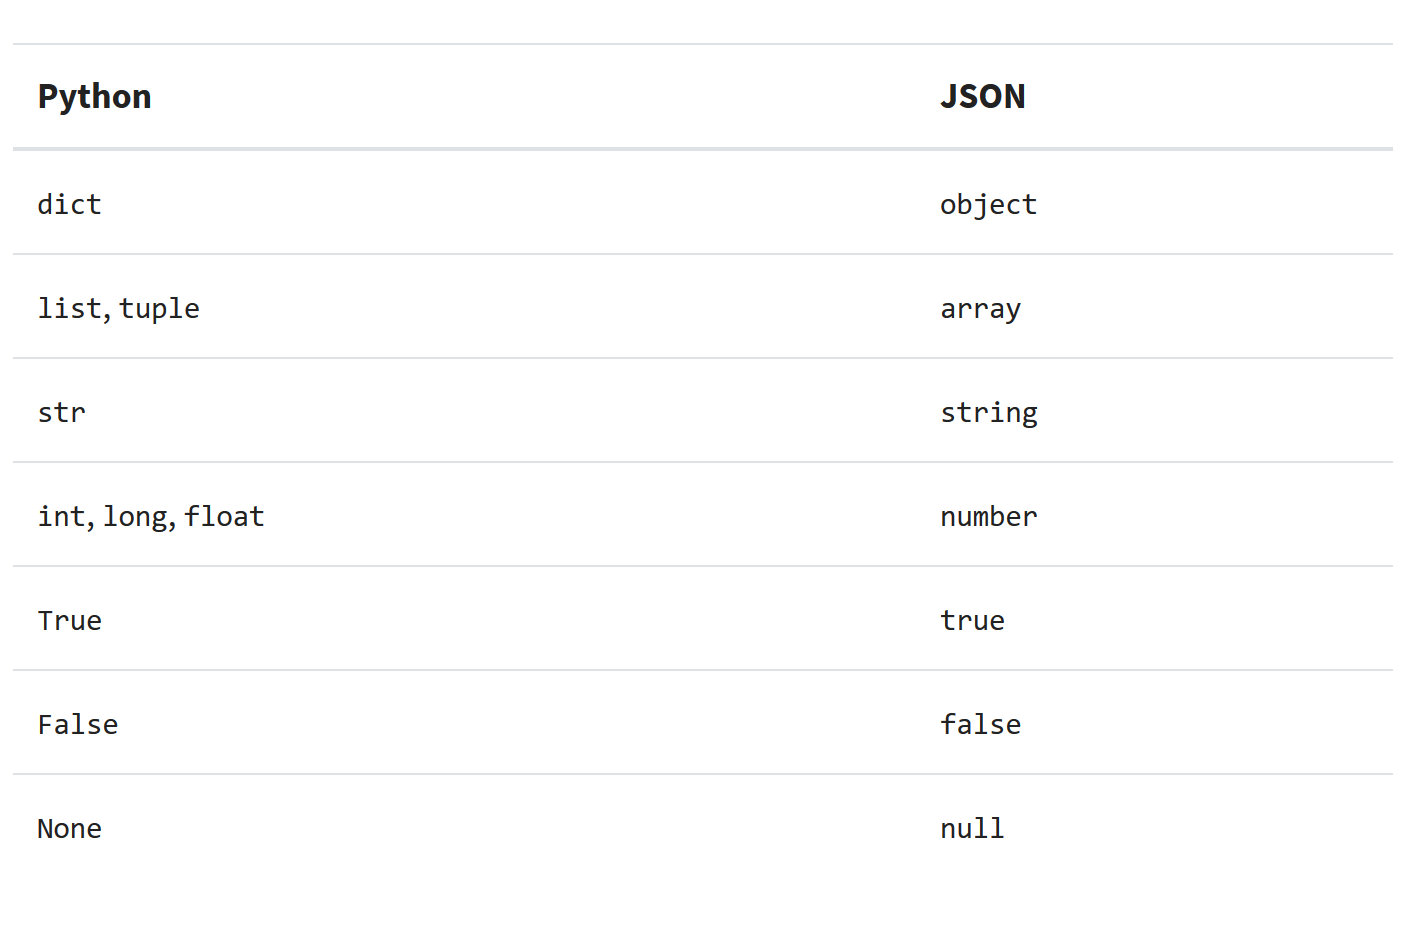

* We can store variety of data types in a JSON file like dictionary, list, tuple

source: https://realpython.com/python-json/

In [1]:
import json
import pandas as pd

In [2]:
data = {
    "president": {
        "name": "Zaphod Beeblebrox",
        "species": "Betelgeusian"
    }
}

print(type(data))
data

<class 'dict'>


{'president': {'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}}

In [3]:
# Writing to a json file
# Use context manager and in write mode

with open("json_example.json",'w') as write_to:
    json.dump(data,write_to)

In [4]:
# Read json file to memory
# Use context manager and in read mode

with open("json_example.json", "r") as read_file:
    deserialized_data = json.load(read_file)
    
deserialized_data

{'president': {'name': 'Zaphod Beeblebrox', 'species': 'Betelgeusian'}}

In [5]:
# Be cautions when using method, dump becaues there the another method, dumps, which converts the content to a str
json_string = json.dumps(data)
json_string

'{"president": {"name": "Zaphod Beeblebrox", "species": "Betelgeusian"}}'

In [6]:
# Attributes for dumps
json_string_indent = json.dumps(data, indent=2)
json_string_indent

'{\n  "president": {\n    "name": "Zaphod Beeblebrox",\n    "species": "Betelgeusian"\n  }\n}'

### CAUTION: File that is serialized and again deserialized may not be same.

In [7]:
blackjack_hand = (8, "Q")
encoded_hand = json.dumps(blackjack_hand)
decoded_hand = json.loads(encoded_hand)

print(blackjack_hand == decoded_hand)

print(type(blackjack_hand), type(decoded_hand))

blackjack_hand == tuple(decoded_hand)

False
<class 'tuple'> <class 'list'>


True

In [8]:
data = (8,"Q")

with open("trail1.json",'w') as t1:
    json.dump(data,t1)
    
with open("trail1.json",'r') as t1:
    deserialized_data = json.load(t1)

print(data == deserialized_data)

print(type(data), type(deserialized_data))

data == tuple(deserialized_data)

False
<class 'tuple'> <class 'list'>


True

#### IMPORTING JSON FILE AS A DATAFRAME

In [9]:
df = {
    'c1':[2,34,4],
    'c2':[5,6,3],
    'c3':[8,23,6]
}

df

{'c1': [2, 34, 4], 'c2': [5, 6, 3], 'c3': [8, 23, 6]}

In [10]:
with open("json_df.JSON","w") as j1:
    json.dump(df,j1)
    
df = pd.read_json('Json_df.JSON') 

type(type(df))

df

,c1,c2,c3
0,2,5,8
1,34,6,23
2,4,3,6


In [11]:
# If we save list of dict as JSON and load it back as a DataFrame then we get values as a list

df = [{
    'c1':[2,34,4],
    'c2':[5,6,3],
    'c3':[8,23,6]
}]

print("list:", df)

with open("json_list_df.JSON","w") as j1:
    json.dump(df,j1)
    
df = pd.read_json('json_list_df.JSON') 

type(type(df))


df

list: [{'c1': [2, 34, 4], 'c2': [5, 6, 3], 'c3': [8, 23, 6]}]


,c1,c2,c3
0,"[2, 34, 4]","[5, 6, 3]","[8, 23, 6]"


#### LIMITATIONS

* DataFrame is not serializable. We need to save dictionary as a JSON and can be imported as a dataframe